<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/(%EC%9E%90%EB%8F%99%ED%99%94)Takt_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'
#런타임  다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
일shift = 1
shift작업시간 = 9
휴식시간_shift = 60
점심시간_shift = 60
유휴율 = 0.35 #(작업 낭비 및 대기율)
일평균작업목표량 =1300

In [3]:
shift작업시간_분 = shift작업시간*일shift*60
예상Loss분_shift = 유휴율*shift작업시간_분
shift_순작업시간 = shift작업시간_분-예상Loss분_shift-휴식시간_shift-점심시간_shift
일_순작업시간 = shift_순작업시간*일shift
takt_time = 일_순작업시간/일평균작업목표량
takt_time

0.1776923076923077

In [4]:
인당_Standard_Time = 55
소요인력 = 인당_Standard_Time / takt_time
소요인력

309.5238095238095

In [5]:
import pandas as pd
#조사된 Minimum-Maximum Standard_Time 입력 -> Minimum= 5분 Maximum= 10분
Minimum= 40
Maximum= 101

results = []
for i in range(Minimum, Maximum, 2):
    인당_Standard_Time = i
    소요인력 = 인당_Standard_Time / takt_time
    results.append((인당_Standard_Time, 소요인력))
    df = pd.DataFrame(results, columns=['인당_Standard_Time', '소요인력'])
df = df.round(1)
df

#파이썬에서, 튜플(Tuple)은 값의 순서가 있고 변경 불가능한(Immutable) 목록(List)입니다. 튜플은 대괄호([ ])가 아니라 소괄호(( ))로 감싸서 생성하며, 쉼표(,)로 구분된 값의 목록으로 표현됩니다. 예를 들어, (1, 2, 3)은 값 1, 2, 3이 순서대로 저장된 튜플입니다. 튜플은 한번 생성된 후에는 값의 추가, 삭제, 수정 등이 불가능합니다. 따라서, 튜플은 변경되지 않아야 하는 값의 목록에 사용됩니다.

,인당_Standard_Time,소요인력
0,40,225.1
1,42,236.4
2,44,247.6
3,46,258.9
4,48,270.1
5,50,281.4
6,52,292.6
7,54,303.9
8,56,315.2
9,58,326.4


In [6]:
# 소요인력과 target의 차이 계산하여 새로운 컬럼 생성
target=500
df['차이'] = abs(df['소요인력'] - target)

# 차이가 가장 작은 행 선택
result2 = df.loc[df['차이'].idxmin()]

print(result2)
# 데이터프레임에서 loc를 사용하여 특정 행을 선택할 수 있습니다. idxmin()은 해당 컬럼에서 가장 작은 값을 가진 인덱스를 반환합니다.
# 따라서 df.loc[df['차이'].idxmin()]은 차이 컬럼에서 가장 작은 값을 가진 행을 선택하는 것입니다. 선택한 행은 result 변수에 저장되며, 이 변수를 출력하면 됩니다.


인당_Standard_Time     88.0
소요인력                495.2
차이                    4.8
Name: 24, dtype: float64


## 그래프로 표현

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

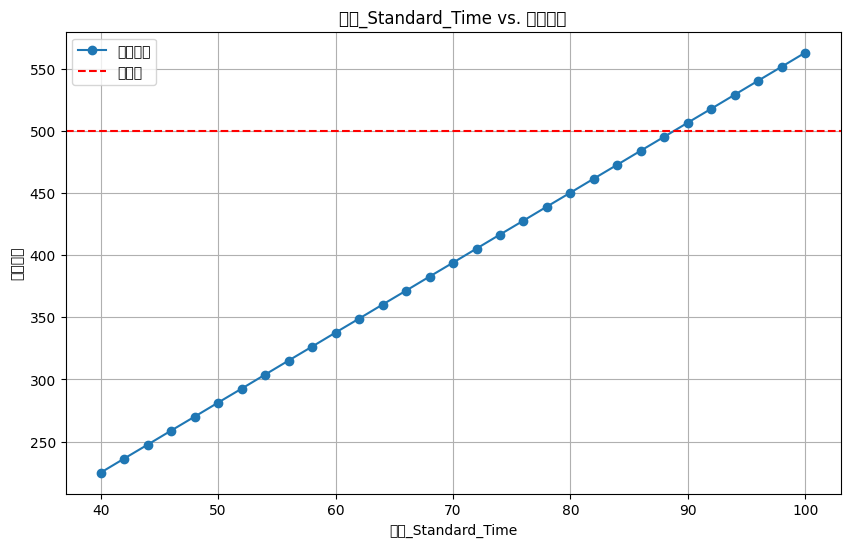

In [7]:
from matplotlib import pyplot as plt
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(df['인당_Standard_Time'], df['소요인력'], marker='o', label='소요인력')
plt.axhline(y=target, color='r', linestyle='--', label='목표값')
plt.xlabel('인당_Standard_Time')
plt.ylabel('소요인력')
plt.title('인당_Standard_Time vs. 소요인력')
plt.grid(True)
plt.legend()  # 범례 표시
plt.show()

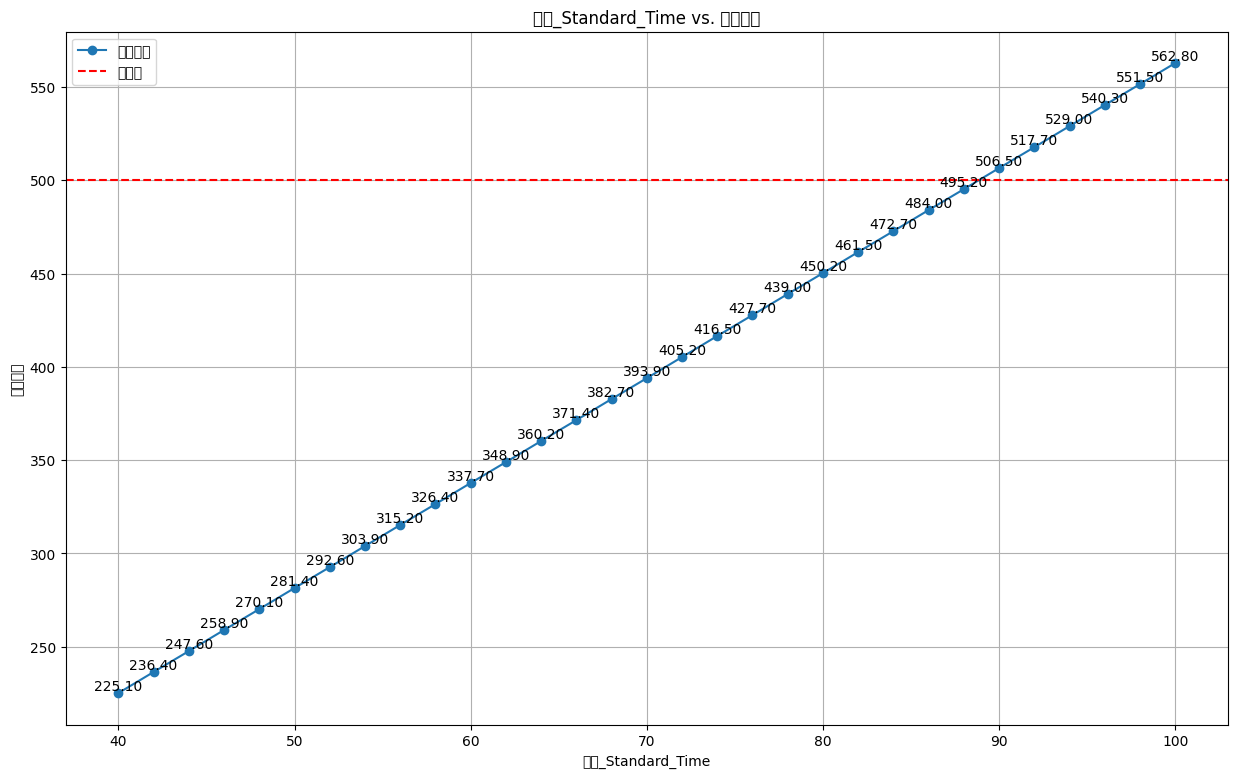

In [8]:
# 그래프 그리기
plt.figure(figsize=(15, 9))  # 그래프 크기 설정
plt.plot(df['인당_Standard_Time'], df['소요인력'], marker='o', label='소요인력')
plt.axhline(y=target, color='r', linestyle='--', label='목표값')
plt.xlabel('인당_Standard_Time')
plt.ylabel('소요인력')
plt.title('인당_Standard_Time vs. 소요인력')
plt.grid(True)

# 데이터 포인트에 레이블 표시
for i in range(len(df)):
    plt.text(df['인당_Standard_Time'][i], df['소요인력'][i], f"{df['소요인력'][i]:.2f}", va='bottom', ha='center')

# 범례 표시
plt.legend()

plt.show()